<a href="https://colab.research.google.com/github/Davish26/textsummariser/blob/main/Copy_of_download_enron_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Downloading Enron Email Data



### Full/Complete Dataset

The following code-cell will download the complete Enron email database to the Colab instance.  It will take about 1-2 mins to download.

In [ ]:
!wget -O enron.db https://curtin-my.sharepoint.com/:u:/g/personal/211934g_curtin_edu_au/EaYagsqa2r1Bi5wtHbswGFwBH2kd2uTnz6rlka7GI36GUQ?download=1

--2023-05-21 16:41:50--  https://curtin-my.sharepoint.com/:u:/g/personal/211934g_curtin_edu_au/EaYagsqa2r1Bi5wtHbswGFwBH2kd2uTnz6rlka7GI36GUQ?download=1
Resolving curtin-my.sharepoint.com (curtin-my.sharepoint.com)... 13.107.136.8, 13.107.138.8, 2620:1ec:8f8::8, ...
Connecting to curtin-my.sharepoint.com (curtin-my.sharepoint.com)|13.107.136.8|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/211934g_curtin_edu_au/Documents/Teaching/ISYS2001/ISYS2001-Assignment-2-Data/enron_sqlite3.db?ga=1 [following]
--2023-05-21 16:41:51--  https://curtin-my.sharepoint.com/personal/211934g_curtin_edu_au/Documents/Teaching/ISYS2001/ISYS2001-Assignment-2-Data/enron_sqlite3.db?ga=1
Reusing existing connection to curtin-my.sharepoint.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 853819392 (814M) [application/octet-stream]
Saving to: ‘enron.db’

enron.db            100%[===================>] 814.27M  60.4MB/s    in 19s     

2023-05-21 16:42:10 (42.

In [ ]:
import sqlite3

In [ ]:
conn = sqlite3.connect("enron.db")

In [ ]:
cur = conn.cursor()

In [ ]:
sql = """
SELECT name
FROM sqlite_master
WHERE type = 'table';
"""
cur.execute(sql)
cur.fetchall()

[('employeelist',), ('message',), ('recipientinfo',), ('referenceinfo',)]

In [ ]:
sql = """
PRAGMA table_info('employeelist');
"""

cur.execute(sql)
cur.fetchall()

[(0, 'eid', 'INTEGER', 1, None, 1),
 (1, 'firstName', 'VARCHAR(31)', 1, "''", 0),
 (2, 'lastName', 'VARCHAR(31)', 1, "''", 0),
 (3, 'Email_id', 'VARCHAR(31)', 1, "''", 0),
 (4, 'Email2', 'VARCHAR(31)', 0, None, 0),
 (5, 'Email3', 'VARCHAR(31)', 0, None, 0),
 (6, 'EMail4', 'VARCHAR(31)', 0, None, 0),
 (7, 'folder', 'VARCHAR(31)', 1, "''", 0),
 (8, 'status', 'VARCHAR(50)', 0, None, 0)]

In [ ]:
sql = """
PRAGMA table_info('message');
"""

cur.execute(sql)
cur.fetchall()

[(0, 'mid', 'INTEGER', 1, "'0'", 1),
 (1, 'sender', 'VARCHAR(127)', 1, "''", 0),
 (2, 'date', 'DATETIME', 0, None, 0),
 (3, 'message_id', 'VARCHAR(127)', 0, None, 0),
 (4, 'subject', 'TEXT', 0, None, 0),
 (5, 'body', 'TEXT', 0, None, 0),
 (6, 'folder', 'VARCHAR(127)', 1, "''", 0)]

In [ ]:
sql = """
PRAGMA table_info('recipientinfo');
"""

cur.execute(sql)
cur.fetchall()

[(0, 'rid', 'INTEGER', 1, "'0'", 1),
 (1, 'mid', 'INTEGER', 1, "'0'", 0),
 (2, 'rtype', 'TEXT', 0, None, 0),
 (3, 'rvalue', 'VARCHAR(127)', 0, None, 0),
 (4, 'dater', 'DATETIME', 0, None, 0)]

In [ ]:
sql = """
PRAGMA table_info('referenceinfo');
"""

cur.execute(sql)
cur.fetchall()

[(0, 'rfid', 'INTEGER', 1, "'0'", 1),
 (1, 'mid', 'INTEGER', 1, "'0'", 0),
 (2, 'reference', 'TEXT', 0, None, 0)]

In [ ]:
#Checking the format of the date
sql = """
SELECT Date
FROM message
"""
cur.execute(sql)
cur.fetchone()

('2000-01-21 04:51:00',)

In [ ]:
import pandas as pd
sql = """
SELECT * from message;
"""
message_df = pd.read_sql_query(sql,conn)
message_df

,mid,sender,date,message_id,subject,body,folder
0,52,press.release@enron.com,2000-01-21 04:51:00,<12435833.1075863606729.JavaMail.evans@thyme>,ENRON HOSTS ANNUAL ANALYST CONFERENCE PROVIDES...,HOUSTON - Enron Corp. hosted its annual equity...,Robert_Badeer_Aug2000Notes FoldersPress releases
1,53,office.chairman@enron.com,2000-01-24 01:37:00,<29664079.1075863606676.JavaMail.evans@thyme>,Over $50 -- You made it happen!,"On Wall Street, people are talking about Enron...",Robert_Badeer_Aug2000Notes FoldersPress releases
2,54,office.chairman@enron.com,2000-01-24 02:06:00,<15300605.1075863606629.JavaMail.evans@thyme>,Over $50 -- You made it happen!,"On Wall Street, people are talking about Enron...",Robert_Badeer_Aug2000Notes FoldersPress releases
3,55,press.release@enron.com,2000-02-02 10:21:00,<10522232.1075863606538.JavaMail.evans@thyme>,ROAD-SHOW.COM Q4i.COM CHOOSE ENRON TO DELIVER ...,"HOUSTON =01) Enron Broadband Services (EBS), a...",Robert_Badeer_Aug2000Notes FoldersPress releases
4,56,office.chairman@enron.com,2000-02-07 22:16:00,<16056123.1075863606515.JavaMail.evans@thyme>,Fortune Most Admired Ranking,Congratulations! For an unprecedented five ye...,Robert_Badeer_Aug2000Notes FoldersPress releases
...,...,...,...,...,...,...,...
252754,404923,karen.buckley@enron.com,2002-02-06 16:51:29,<16183734.1075840015218.JavaMail.evans@thyme>,URGENT - NEED CONFIRMATION TODAY,X-FileName: Pls confirm at what location (i.e ...,"ExMerge - Dean, CraigInbox"
252755,404924,karen.buckley@enron.com,2002-02-06 17:17:39,<28117049.1075840015191.JavaMail.evans@thyme>,,X-FileName: Craig - I need the date and locati...,"ExMerge - Dean, CraigInbox"
252756,404925,liz.taylor@enron.com,2002-02-06 20:09:37,<32633742.1075840015168.JavaMail.evans@thyme>,Trader Presentations - 2/7 @ 2:30 p.m. (CST) i...,X-FileName: There will be two presentatio...,"ExMerge - Dean, CraigInbox"
252757,404926,pete.davis@enron.com,2002-02-07 04:38:13,<17912146.1075840015125.JavaMail.evans@thyme>,Start Date: 2/7/02; HourAhead hour: 3;,X-FileName: Start Date: 2/7/02; HourAhead hour...,"ExMerge - Dean, CraigInbox"


In [ ]:
message_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252759 entries, 0 to 252758
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   mid         252759 non-null  int64 
 1   sender      252759 non-null  object
 2   date        252759 non-null  object
 3   message_id  252759 non-null  object
 4   subject     252759 non-null  object
 5   body        252759 non-null  object
 6   folder      252759 non-null  object
dtypes: int64(1), object(6)
memory usage: 13.5+ MB


In [ ]:
sql = """
SELECT strftime('%Y-%m-%d', date) AS day, COUNT(*) AS count_email
FROM message
Group by day
"""
cur.execute(sql)
cur.fetchone()

('0001-05-30', 2)

In [ ]:
sql = """
SELECT strftime('%Y-%w', date) AS week, COUNT(*) AS count_email
FROM message
Group by week
"""
cur.execute(sql)
cur.fetchone()

('0001-0', 4)

In [75]:
sql = """
SELECT strftime('%Y-%m', date) AS month, COUNT(*) AS count_email
FROM message
Group by month
"""
cur.execute(sql)
cur.fetchone()

('0001-05', 2)

In [103]:
import pandas as pd
message_df = pd.read_sql_query(sql,conn)

In [104]:
message_df.value_counts("count_email")

count_email
1         3
53        2
2         1
3         1
6         1
85        1
205       1
4760      1
22562     1
68707     1
156320    1
dtype: int64

In [108]:
employeelist_df = pd.read_sql_query(sql,conn)
employeelist_df

,year,count_email
0,0001,205
1,0002,53
2,1979,6
3,1997,1
4,1998,85
5,1999,4760
6,2000,68707
7,2001,156320
8,2002,22562
9,2004,53


In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

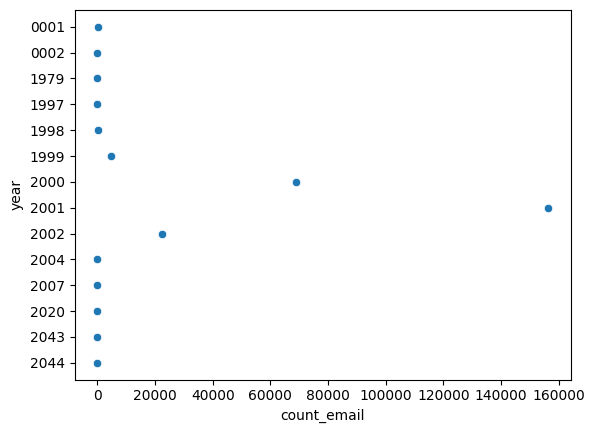

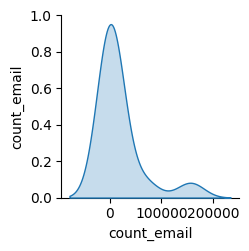

In [115]:
sns.scatterplot(x='count_email', y='year', data=message_df, )
plt.show()
sns.pairplot(data=message_df, diag_kind='kde')

In [112]:
sns.countplot(x='count_email', y='year', data=message_df, )
plt.show()

ValueError: ignored